<a href="https://colab.research.google.com/github/naimish75/Stock-Prediction-using-LSTM/blob/main/Custom_LSTM_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install yfinance

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout
import yfinance as yf

In [9]:
company = "GOOG"
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2020, 1, 1)

# Fetch data
data = yf.download(company, start=start, end=end)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
2012-01-06,16.131855,16.379533,16.126146,16.358437,108119746
2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...
2019-12-24,66.937485,67.271284,66.898623,67.183602,6950000
2019-12-26,67.776466,67.822657,66.982825,67.067519,13350000


In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [11]:
prediction_days = 60
X_train = []
y_train = []

In [12]:
for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Model Creation

In [13]:
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - loss: 0.0559
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0039
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0031
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0030
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.0033
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0031
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0025
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0028
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0027
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 0.0026
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0023
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0023
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0021
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0021
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.002

In [15]:
model.save("stock_pred.h5")

# Prediction

In [16]:
company = "GOOG"
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

test_data = yf.download(company, start=test_start, end=test_end)
test_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-01-02,68.123726,68.162086,66.837348,66.837348,28132000
2020-01-03,67.789421,68.379304,67.036329,67.151713,23728000
2020-01-06,69.460922,69.575007,67.258334,67.258334,34646000
2020-01-07,69.417580,69.898350,69.270107,69.646760,30054000
2020-01-08,69.964615,70.326314,69.293024,69.354799,30560000
...,...,...,...,...,...
2025-01-17,197.550003,198.809998,195.309998,198.050003,22109100
2025-01-21,199.630005,203.839996,199.440002,200.509995,19005200


In [17]:
actual_prices = test_data['Close'].values

In [18]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [19]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [20]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [22]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step


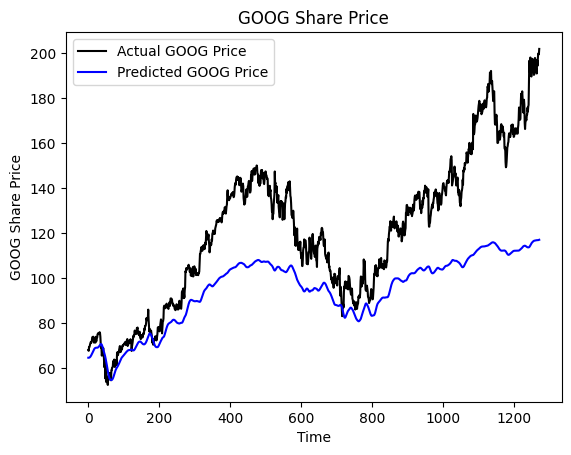

In [23]:
plt.plot(actual_prices, color='black', label=f"Actual {company} Price")
plt.plot(predicted_prices, color='blue', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [24]:
from tensorflow.keras.models import load_model
model2 = load_model("stock_pred.h5")

In [25]:
# Next Day prediction
real_data = [model_inputs[len(model_inputs) + 2 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [26]:
prediction = model2.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: [[117.22279]]
